In [1]:
# See through the cifar-10 dataset and display some image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
import torchvision

import gc

import os
import sys
from LeNet import LeNet5
from utils import cross_entropy_loss, one_hot_y

In [2]:
# Download CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.CIFAR10(
    root="data", train=True, download=True, transform=transform
)
test_dataset = torchvision.datasets.CIFAR10(
    root="data", train=False, download=True, transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
len(train_dataset), len(test_dataset)  # 50000 train and 10000 test data

(50000, 10000)

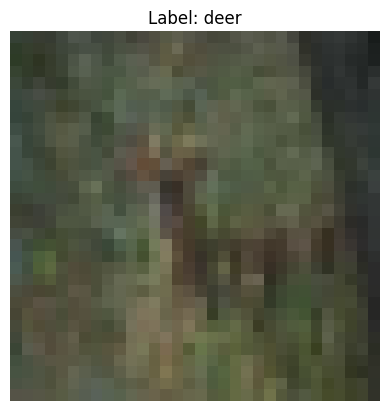

In [4]:
# Access one instance from the train_dataset
image, label = train_dataset[
    10
]  # Replace 0 with any index to view a different instance

# Convert the image tensor to a NumPy array for visualization
image = np.transpose(
    image.numpy(), (1, 2, 0)
)  # Rearrange dimensions from (C, H, W) to (H, W, C)

# CIFAR-10 class names
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)

# Display the image with its label
plt.imshow(image)
plt.title(f"Label: {classes[label]}")  # Map the label to its class name
plt.axis("off")
plt.show()

In [5]:
# Convert train and test datasets to tensors
train_images_tensor = torch.stack(
    [train_dataset[i][0] for i in range(len(train_dataset))]
)
train_labels_tensor = torch.tensor(
    [train_dataset[i][1] for i in range(len(train_dataset))]
)

test_images_tensor = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
test_labels_tensor = torch.tensor(
    [test_dataset[i][1] for i in range(len(test_dataset))]
)

print(f"Train images tensor shape: {train_images_tensor.shape}")
print(f"Train labels tensor shape: {train_labels_tensor.shape}")
print(f"Test images tensor shape: {test_images_tensor.shape}")
print(f"Test labels tensor shape: {test_labels_tensor.shape}")

# Convert tensors to NumPy arrays
train_images_numpy = train_images_tensor.numpy()
train_labels_numpy = train_labels_tensor.numpy()

test_images_numpy = test_images_tensor.numpy()
test_labels_numpy = test_labels_tensor.numpy()

train_images_numpy = train_images_numpy[:10]
train_labels_numpy = train_labels_numpy[:10]

print(f"Train images NumPy shape: {train_images_numpy.shape}")
print(f"Train labels NumPy shape: {train_labels_numpy.shape}")
print(f"Test images NumPy shape: {test_images_numpy.shape}")
print(f"Test labels NumPy shape: {test_labels_numpy.shape}")


# Clear tensors from memory
del train_images_tensor
del train_labels_tensor
del test_images_tensor
del test_labels_tensor

# Force garbage collection to free up memory
gc.collect()

Train images tensor shape: torch.Size([50000, 3, 32, 32])
Train labels tensor shape: torch.Size([50000])
Test images tensor shape: torch.Size([10000, 3, 32, 32])
Test labels tensor shape: torch.Size([10000])
Train images NumPy shape: (10, 3, 32, 32)
Train labels NumPy shape: (10,)
Test images NumPy shape: (10000, 3, 32, 32)
Test labels NumPy shape: (10000,)


0

In [6]:
in_channel = 3
out_channel = 32
kernel_size = 5
stride = 1
padding = 1

model = LeNet5()
logit = model.forward(train_images_numpy)

predictions = np.argmax(logit)

In [7]:
Y = one_hot_y(train_labels_numpy, 10)
loss = cross_entropy_loss(logit, Y)
print(loss)

276.3102111592854


In [8]:
print(Y.shape)
print(logit.shape)

(10, 10)
(10, 10)


In [9]:
gradient = logit - Y

In [10]:
model.backward(gradient)

array([[ 3.20319724e+00,  5.40404671e+00,  4.12637010e+00, ...,
         5.38749692e+00,  1.69490579e+00,  2.48848484e+00],
       [ 4.00552449e+00,  1.95843218e+00,  1.84642043e+00, ...,
         2.16051821e+00, -3.68366159e-01, -1.63045667e-01],
       [ 4.00552449e+00,  1.95843218e+00,  1.84642043e+00, ...,
         2.16051821e+00, -3.68366159e-01, -1.63045667e-01],
       ...,
       [ 3.03744321e+00,  3.60092468e+00,  3.01634148e+00, ...,
         2.26137898e+00,  2.15579824e+00,  2.36278409e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.88063640e+00,  2.84498472e+00,  7.67912836e-01, ...,
         2.28233311e+00, -1.68512138e-01,  2.76900037e-03]])